In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)


# DataFrame에 data row 추가하기

## `loc[]`을 사용하여 추가하기

In [2]:
df = pd.DataFrame(columns=['a', 'b'])
df.head()

,a,b


### Add data as 'list'

In [3]:
 # loc 함수에 =를 사용하여 할당하면, set operation.
df.loc[0] = [1, 2]
df.head()

,a,b
0,1,2


In [4]:
df.loc['ㅋㅋ'] = [1, 2]
df.head()

,a,b
0,1,2
ㅋㅋ,1,2


### Add data as 'dict'

In [5]:
df.loc[len(df)] = {'b' : 'ㅎ', 'a': 'ㅋ'}
df.head()

,a,b
0,1,2
ㅋㅋ,1,2
2,ㅋ,ㅎ


### Add data as 'Series'

In [6]:
df.loc["yay"] = pd.Series({'a': 'ㅋ', 'b' : 'ㅎ'})
df.tail()

,a,b
0,1,2
ㅋㅋ,1,2
2,ㅋ,ㅎ
yay,ㅋ,ㅎ


In [7]:
# 이미 존재한는 index에 넣기 
df.loc["yay"] = pd.Series({'a': '1111', 'b' : '2222'})
df.tail()
# inplace 방식이 속도가 빠르다. 
# 대신 기존의 df가 변하는 방식이다.

,a,b
0,1,2
ㅋㅋ,1,2
2,ㅋ,ㅎ
yay,1111,2222


- 위 방법들은 다 inplace 방식

## `append()` 사용하여 추가하기

- 위의 `loc`과는 다르게 not in-place(returns a new copy of the DataFrame)

- `append()` : it only accecpt
    - DataFrame
    - Series
    - Dictionary
    - list of these(**Not `list` itself**)

In [8]:
names_df = pd.DataFrame(
    {
        'Name':['철수', '영희', '영수', '영미'],
        'Age':[12, 13, 14, 15]
    },
    index = ['Canada', 'Canada', 'USA', 'USA']
)
names_df

,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15


In [9]:
# Error (에러내용 확인!) => index를 뭐로 설정해야될지 모르기 때문
names_df.append(
    {'Name':'명수', 'Age':1}
)

C:\Users\hs041\AppData\Local\Temp\ipykernel_13072\707511184.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append(


TypeError: Can only append a dict if ignore_index=True

### `ignore_index=True`

- 이전 index를 다 reset한다

In [10]:
names_df.append( 
    {'Name':'명수', 'Age':100},
    ignore_index=True
)
# append는 데이터를 복사하여 반환하기 때문에, 알아서 아웃풋이 아래에 뜬다. 

C:\Users\hs041\AppData\Local\Temp\ipykernel_13072\1614104295.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append(


,Name,Age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,100


In [11]:
# 리스트 of 딕셔너리로도 전달 가능
names_df.append(
    [
        {'Name':'명수', 'Age':1},
        {'Name':'동수', 'Age':2}
    ], 
    ignore_index=True
)

C:\Users\hs041\AppData\Local\Temp\ipykernel_13072\2617683630.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append(


,Name,Age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,1
5,동수,2


In [12]:
# append()는 내부적으로 copy()를 하기 때문에, 원본은 그대로 유지
names_df

,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15


### Original index 유지하기 => `append()` 할 때, `dict`대신에 `Series`를 전달하면 됨

- 참고: `Series`를 `append`를 할 때는, `Series`의 index가 target DataFrame의 column이 되고, name이 target DataFrame의 index가 됨

In [13]:
# `name` arg를 통해서 Series의 name을 부여하기
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names_df))
s

Name    Zach
Age        3
Name: 4, dtype: object

In [14]:
names_df.append(s)

C:\Users\hs041\AppData\Local\Temp\ipykernel_13072\2608611499.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append(s)


,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15
4,Zach,3


In [15]:
# 리스트 of Series로도 전달 가능
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names_df))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names_df.append([s1, s2])

C:\Users\hs041\AppData\Local\Temp\ipykernel_13072\1183066442.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_df.append([s1, s2])


,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15
4,Zach,3
USA,Zayd,2


- 참고: Series의 `name`은 어떤 operation을 하느냐에 따라서, index or column이 될 수 있음

In [24]:
pd.concat([s1, s2], axis=1)

,4,USA
Name,Zach,Zayd
Age,3,2


# concat, join, and merge 

## `concat()` 

- DataFrame or Series object를 수직적으로 or 수평적으로 '연결'
- **index(or columns)**에 대해 algin (not values)
- Defaults to `outer` join
    - operation axis에 따라 concat되는 object의 column or index가 union됨

- 예제

In [25]:
import FinanceDataReader as fdr

In [26]:
samsung_df = fdr.DataReader('005390', '2009-01-01', '2017-12-31')
kodex_df = fdr.DataReader('069500', '2016-01-01', '2017-12-31')

In [27]:
samsung_df.head(2)
kodex_df.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,21014,21022,20655,20668,7995243,-0.020
2016-01-05,20614,20860,20614,20797,14332501,0.006


In [28]:
pd.concat(
    [samsung_df, kodex_df]
) 
# concat은 항상 df의 리스트를 받는다.
# 기본 axis = 0으로, 위아래로 붙인다.
# 삼성df 놓고, 끝나는 부분에 kodex_df를 가져다 붙였음
# 컬럼 수가 똑같아서 잘 붙음

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047
2009-01-06,210,234,210,212,2144,-0.049
2009-01-07,214,220,208,216,2434,0.019
2009-01-08,216,220,200,215,2280,-0.005
...,...,...,...,...,...,...
2017-12-21,29303,29356,28802,28812,9503365,-0.019
2017-12-22,28883,29009,28810,28950,9414006,0.005
2017-12-26,29006,29181,28824,28833,8438285,-0.004


- Column, Index alignment 특징은 그대로 적용됨!

In [29]:
kodex_df[['Open', 'Close']].head()

,Open,Close
Date,,
2016-01-04,21014,20668
2016-01-05,20614,20797
2016-01-06,20786,20647
2016-01-07,20590,20448
2016-01-08,20320,20594


In [33]:
pd.concat(
    [
        samsung_df, 
        kodex_df[['Open', 'Close']]
    ]
).tail(2)   # head()도 한번 실행해보세요!
# 삼성 뒤에 kodex_df의 맞는 컬럼만 붙이고, 나머지는 NaN으로 채워진다.

# 보통 이렇게 붙이지는 않는다. 같은 종목도 아니고...
# 멀티인덱스로 종목명을 설정하고 진행하는 경우가 대부분.

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-12-27,28924,NaN,NaN,29172,NaN,NaN
2017-12-28,29177,NaN,NaN,29536,NaN,NaN


- `keys`, `names` args

In [35]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'], 
)

Open   High    Low  Close    Volume  Change
         Date                                                    
삼성       2009-01-02    200    234    200    234      2122   0.083
         2009-01-05    229    234    213    223      6890  -0.047
         2009-01-06    210    234    210    212      2144  -0.049
         2009-01-07    214    220    208    216      2434   0.019
         2009-01-08    216    220    200    215      2280  -0.005
...                    ...    ...    ...    ...       ...     ...
KODEX200 2017-12-21  29303  29356  28802  28812   9503365  -0.019
         2017-12-22  28883  29009  28810  28950   9414006   0.005
         2017-12-26  29006  29181  28824  28833   8438285  -0.004
         2017-12-27  28924  29163  28864  29172  14044451   0.012
         2017-12-28  29177  29561  29172  29536   8391279   0.012

[2718 rows x 6 columns]

In [36]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'],
    names=['종목명']
).head()

# 이렇게 index에 이름을 붙여놓으면, reset_index할 때 이름이 컬럼명으로 그대로 간다는 장점이 있다.

Open  High  Low  Close  Volume  Change
종목명 Date                                              
삼성  2009-01-02   200   234  200    234    2122   0.083
    2009-01-05   229   234  213    223    6890  -0.047
    2009-01-06   210   234  210    212    2144  -0.049
    2009-01-07   214   220  208    216    2434   0.019
    2009-01-08   216   220  200    215    2280  -0.005

In [37]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'],
    names=['종목명', '날짜']
).head()

Open  High  Low  Close  Volume  Change
종목명 날짜                                                
삼성  2009-01-02   200   234  200    234    2122   0.083
    2009-01-05   229   234  213    223    6890  -0.047
    2009-01-06   210   234  210    212    2144  -0.049
    2009-01-07   214   220  208    216    2434   0.019
    2009-01-08   216   220  200    215    2280  -0.005

- On `axis` = 1  

In [38]:
pd.concat([samsung_df, kodex_df], axis=1).head()
# 옆으로 붙이니까 컬럼 정렬은 안되고, 인덱스가 정렬된 것을 알 수 있다.

,Open,High,Low,Close,Volume,Change,Open,High,Low,Close,Volume,Change
Date,,,,,,,,,,,,
2009-01-02,200,234,200,234,2122,0.083,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,229,234,213,223,6890,-0.047,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,210,234,210,212,2144,-0.049,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,214,220,208,216,2434,0.019,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,216,220,200,215,2280,-0.005,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
pd.concat([samsung_df, kodex_df], keys=['삼성', 'KODEX200'], axis=1).head(2)

삼성                               KODEX200                        \
           Open High  Low Close Volume Change     Open High Low Close Volume   
Date                                                                           
2009-01-02  200  234  200   234   2122  0.083      NaN  NaN NaN   NaN    NaN   
2009-01-05  229  234  213   223   6890 -0.047      NaN  NaN NaN   NaN    NaN   

                   
           Change  
Date               
2009-01-02    NaN  
2009-01-05    NaN

- `join`  argument
    - How to handle **indexes** on **other** axis(es). 즉, concat의 대상이 되는(=명시되는) axis 말고, 다른 axis에 대해 어떻게 join할 것인가

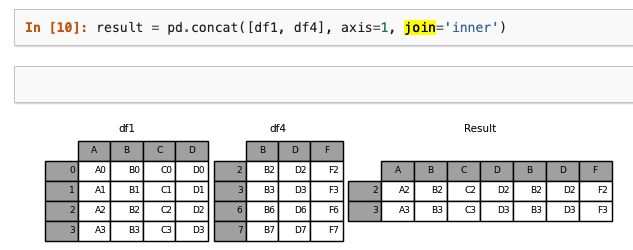

In [41]:
# default 'outer' join
pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex'], axis=1, names=['종목명']).head()

종목명          삼성                               kodex                        \
           Open High  Low Close Volume Change  Open High Low Close Volume   
Date                                                                        
2009-01-02  200  234  200   234   2122  0.083   NaN  NaN NaN   NaN    NaN   
2009-01-05  229  234  213   223   6890 -0.047   NaN  NaN NaN   NaN    NaN   
2009-01-06  210  234  210   212   2144 -0.049   NaN  NaN NaN   NaN    NaN   
2009-01-07  214  220  208   216   2434  0.019   NaN  NaN NaN   NaN    NaN   
2009-01-08  216  220  200   215   2280 -0.005   NaN  NaN NaN   NaN    NaN   

종목명                
           Change  
Date               
2009-01-02    NaN  
2009-01-05    NaN  
2009-01-06    NaN  
2009-01-07    NaN  
2009-01-08    NaN

In [42]:
# join = inner (date intersection)
pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex'], axis=1, names=['종목명'], join='inner').head()

종목명           삼성                                    kodex                \
            Open  High   Low Close   Volume Change   Open   High    Low   
Date                                                                      
2016-01-04  1470  1485  1430  1430   862249 -0.017  21014  21022  20655   
2016-01-05  1405  1440  1400  1400   844949 -0.021  20614  20860  20614   
2016-01-06  1415  1435  1390  1400  1061873  0.000  20786  20807  20528   
2016-01-07  1405  1415  1350  1350  1184923 -0.036  20590  20667  20389   
2016-01-08  1315  1365  1290  1360   886329  0.007  20320  20600  20275   

종목명                                 
            Close    Volume Change  
Date                                
2016-01-04  20668   7995243 -0.020  
2016-01-05  20797  14332501  0.006  
2016-01-06  20647  12550141 -0.007  
2016-01-07  20448  12940587 -0.010  
2016-01-08  20594  14144370  0.007

In [40]:
# concat 방향이 axis=0이니까, axis=1에 대해서 join이 적용됨
pd.concat([samsung_df.head(), kodex_df[['Close']].head()], join='inner')

,Close
Date,
2009-01-02,234
2009-01-05,223
2009-01-06,212
2009-01-07,216
2009-01-08,215
2016-01-04,20668
2016-01-05,20797
2016-01-06,20647
2016-01-07,20448


- 주의 : `outer` join & column 명이 서로 겹치는 게 없을 때 ! => alignment 가 일치하는게 없으니 NaN으로 메꾼다!

In [43]:
samsung_diff_col_df = samsung_df.copy()
samsung_diff_col_df.columns = ['1_' + col  for col in samsung_df.columns]
samsung_diff_col_df.head()

,1_Open,1_High,1_Low,1_Close,1_Volume,1_Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047
2009-01-06,210,234,210,212,2144,-0.049
2009-01-07,214,220,208,216,2434,0.019
2009-01-08,216,220,200,215,2280,-0.005


In [44]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047
2009-01-06,210,234,210,212,2144,-0.049
2009-01-07,214,220,208,216,2434,0.019
2009-01-08,216,220,200,215,2280,-0.005


In [45]:
pd.concat([samsung_diff_col_df, kodex_df]).head()

,1_Open,1_High,1_Low,1_Close,1_Volume,1_Change,Open,High,Low,Close,Volume,Change
Date,,,,,,,,,,,,
2009-01-02,200.000,234.000,200.000,234.000,2122.000,0.083,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,229.000,234.000,213.000,223.000,6890.000,-0.047,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,210.000,234.000,210.000,212.000,2144.000,-0.049,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,214.000,220.000,208.000,216.000,2434.000,0.019,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,216.000,220.000,200.000,215.000,2280.000,-0.005,NaN,NaN,NaN,NaN,NaN,NaN


### 실전예제: concat을 이용해서 close 데이터만 뽑아내기

In [46]:
total_df = pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex200'], names=['종목명'])
total_df.head()
total_df.tail()

Open  High  Low  Close  Volume  Change
종목명 Date                                              
삼성  2009-01-02   200   234  200    234    2122   0.083
    2009-01-05   229   234  213    223    6890  -0.047
    2009-01-06   210   234  210    212    2144  -0.049
    2009-01-07   214   220  208    216    2434   0.019
    2009-01-08   216   220  200    215    2280  -0.005

Open   High    Low  Close    Volume  Change
종목명      Date                                                    
kodex200 2017-12-21  29303  29356  28802  28812   9503365  -0.019
         2017-12-22  28883  29009  28810  28950   9414006   0.005
         2017-12-26  29006  29181  28824  28833   8438285  -0.004
         2017-12-27  28924  29163  28864  29172  14044451   0.012
         2017-12-28  29177  29561  29172  29536   8391279   0.012

In [47]:
total_df = total_df.reset_index()
total_df.head()

,종목명,Date,Open,High,Low,Close,Volume,Change
0,삼성,2009-01-02,200,234,200,234,2122,0.083
1,삼성,2009-01-05,229,234,213,223,6890,-0.047
2,삼성,2009-01-06,210,234,210,212,2144,-0.049
3,삼성,2009-01-07,214,220,208,216,2434,0.019
4,삼성,2009-01-08,216,220,200,215,2280,-0.005


In [48]:
total_df.pivot(index='Date', columns='종목명', values='Close')
# 테이블을 새로 만드는 방법. 원하는 value만 나타내면 된다면, index와 columns를 설정하면 된다. 
# 인덱스 값은 같은데, 다른 컬럼값이 다른 행들이 존재하는 경우, 이렇게 다른 테이블을 만들어낼 수 있다.

종목명,kodex200,삼성
Date,,
2009-01-02,NaN,234.000
2009-01-05,NaN,223.000
2009-01-06,NaN,212.000
2009-01-07,NaN,216.000
2009-01-08,NaN,215.000
...,...,...
2017-12-21,28812.000,1050.000
2017-12-22,28950.000,1050.000
2017-12-26,28833.000,1060.000


- `pivot()` 예시

In [49]:
sample_data = pd.DataFrame(
    {
        "종목명":["삼성", "현대", "하이닉스", "삼성", "현대", "하이닉스"],
        "datetime":["2019-01-01", "2019-01-01", "2019-01-01", "2019-01-02", "2019-01-02", "2019-01-02"],
        "price":[1,2,3, 4,5,6]
    }
)
sample_data

,종목명,datetime,price
0,삼성,2019-01-01,1
1,현대,2019-01-01,2
2,하이닉스,2019-01-01,3
3,삼성,2019-01-02,4
4,현대,2019-01-02,5
5,하이닉스,2019-01-02,6


In [50]:
sample_data.sort_values("종목명")

,종목명,datetime,price
0,삼성,2019-01-01,1
3,삼성,2019-01-02,4
2,하이닉스,2019-01-01,3
5,하이닉스,2019-01-02,6
1,현대,2019-01-01,2
4,현대,2019-01-02,5


In [51]:
sample_data.pivot(index="datetime", columns="종목명", values="price")

종목명,삼성,하이닉스,현대
datetime,,,
2019-01-01,1,3,2
2019-01-02,4,6,5


## `join()`

- 2개의 (보통 index가 다른) dataframe을 하나의 dataframe으로 합칠 때 사용
- Aligns the calling DataFrame's **column(s) or index** with the other DataFrame's **index** 
    1. index - index
    2. columns - index (calling object는 column, called object는 index)
        - `on` arg = calling object의 column
            - called object의 index를 calling object의 "어떤 column"에 맞출것인가 
        - `set_index()` 후,  `on`없이 index-index join과 같은 결과 
- Cartesian product joining
- Defaults to `left` join
- 대부분의 경우 merge랑 호환 가능

- 예제1

In [52]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

In [53]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [54]:
left
right

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [55]:
left.join(right)
# 기본이 left join이기 때문에, left(calling object)가 가지고 있는 인덱스 기준으로 맞춘다.

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [56]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- 예제2

In [57]:
left = pd.DataFrame(
    {
        'A':['A0', 'A1', 'A2', 'A3'],
        'B':['B0', 'B1', 'B2', 'B3'],
        'key':['K0', 'K1', 'K0', 'K1'],
    }
)
right = pd.DataFrame(
    {
        'C':['C0', 'C1'],
        'D':['D0', 'D1'],
    },
    index=['K0', 'K1']
)
left
right

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


,C,D
K0,C0,D0
K1,C1,D1


- 아래 둘은 결과 같음

In [60]:
left.join(right, on='key')
left.join(right, on='key').set_index("key")
# on에는 called object의 인덱스를 calling object의 어떤 컬럼에 맞출 것인가를 표시.
# 이 어떤 컬럼인가?를 선택하는 것이 바로, 값을 기준으로 붙인다는 의미.
# on을 안쓰면 인덱스끼리 맞춰서 join한다.

# concat과 뚜렷하게 차이나는 부분.

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


,A,B,C,D
key,,,,
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K0,A2,B2,C0,D0
K1,A3,B3,C1,D1


In [61]:
left.set_index('key')
left.set_index('key').join(right)

,A,B
key,,
K0,A0,B0
K1,A1,B1
K0,A2,B2
K1,A3,B3


,A,B,C,D
K0,A0,B0,C0,D0
K0,A2,B2,C0,D0
K1,A1,B1,C1,D1
K1,A3,B3,C1,D1


- l_suffix, r_suffix

In [62]:
a = pd.DataFrame([1,2,3], index=['a','b','c'], columns=['안녕'])
b = pd.DataFrame([4,2,6], index=['a','c','d'], columns=['안녕'])
a
b
# 컬럼명이 같은 경우, 구분하는 방법이 필요하다.

,안녕
a,1
b,2
c,3


,안녕
a,4
c,2
d,6


In [63]:
a.join(b, lsuffix="_x", rsuffix="_y", how="inner")
# 위와 같이 컬럼명에 suffix를 붙일 수 있다.

,안녕_x,안녕_y
a,1,4
c,3,2


- 예제3 (앞의 lec1\_3에서 median_시가총액 연결하기)

In [64]:
a_df = pd.read_csv("my_data/Small_and_Big.csv", index_col=[0])
a_df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000


In [65]:
median_df = a_df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.columns = ['시가총액_median']
median_df.head()

,시가총액_median
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


In [66]:
joined_df = a_df.join(median_df, on="date")
joined_df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),시가총액_median
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000,34947000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000,34947000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000,34947000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000,34947000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000,34947000000.000


In [ ]:
joined_df[joined_df['date'] == "2000-08-31"].head()

In [ ]:
joined_df.loc[joined_df['시가총액 (보통)(평균)(원)'] > joined_df['시가총액_median'], 'Size'] = 'Big'

In [ ]:
joined_df.loc[joined_df['시가총액 (보통)(평균)(원)'] < joined_df['시가총액_median'], 'Size'] = 'Small'

In [72]:
joined_df

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),시가총액_median,Size
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000,34947000000.000,Small
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000,34947000000.000,Big
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000,34947000000.000,Big
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000,34947000000.000,Big
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000,34947000000.000,Small
...,...,...,...,...,...,...,...,...
235924,2018-06-30,흥국에프엔비,0.950,1.364,-1.690,64926000000.000,164650000000.000,Small
235925,2018-06-30,흥국화재,0.650,0.721,8.890,383175000000.000,164650000000.000,Big
235926,2018-06-30,흥아해운,0.920,1.240,-5.750,134473000000.000,164650000000.000,Small
235927,2018-06-30,희림,1.390,0.216,2.230,86250000000.000,164650000000.000,Small


In [ ]:
# Hint: 아래와 같은 느낌으로 하시면 됩니다.
# cond1 = joined_df['시가총액(보통~~)'] <  joined_df['시가총액_median']
# joined_df.loc[cond1, "small_or_big"] = "small"
# joined_df.loc[~cond1, "small_or_big"] = "big"

## `merge()`

- Aligns the calling DataFrame's *column(s)* with the other DataFrame's *column(s)*
    - `left_index`, `right_index` argument도 존재하긴 함(index-index alignment시)
    - `join()`
        - 사실 내부적으로 `reset_index()` 하고 `merge()` 호출함
- Cartesian product joining
- Defaults to `inner` join
- `concat()`과 달리, index, column명이 아니라, value 값 자체를 이용한 join

In [73]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [74]:
left
right

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [75]:
# default: inner join(교집합)
pd.merge(left, right, on=['key1', 'key2'])
# on 인자는 기본으로 넣어야 한다. 
# 예제에서 입력된 두 컬럼의 값이 같은 행만 merge된다. inner join이기 때문.

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [76]:
# outer join(합집합)
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [77]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [78]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- More about Cartesian product joining

In [79]:
left = pd.DataFrame({'A':[1,2,], 'B':[2,2]})
right = pd.DataFrame({'A':[4,5,6], 'B':[2,2,2]})
left
right
# 카르테시안 곱: 가능한 모든 조합을 모두 만든다.

,A,B
0,1,2
1,2,2


,A,B
0,4,2
1,5,2
2,6,2


In [80]:
# left, right, inner, outer 결과가 다 같음
# B를 기준으로 붙이는데, B에 2밖에 없기 때문.
pd.merge(left, right, on="B", how='left')
# 참고: suffix는 기본값이 있어서, 같은 컬럼명에 붙은 것. 

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


- 예제

In [81]:
close_df = samsung_df['Close'].reset_index()
vol_df = samsung_df['Volume'].reset_index()

In [82]:
close_df.head()
vol_df.head()

,Date,Close
0,2009-01-02,234
1,2009-01-05,223
2,2009-01-06,212
3,2009-01-07,216
4,2009-01-08,215


,Date,Volume
0,2009-01-02,2122
1,2009-01-05,6890
2,2009-01-06,2144
3,2009-01-07,2434
4,2009-01-08,2280


In [83]:
vol_df.iloc[:2]
# 작동원리를 한번 보기 위해 위의 2 행만 가지고 해보자.

,Date,Volume
0,2009-01-02,2122
1,2009-01-05,6890


In [84]:
# default is 'inner' join
pd.merge(close_df, vol_df.iloc[:2])   # 알아서 같은 column 이름끼리 맞춤

,Date,Close,Volume
0,2009-01-02,234,2122
1,2009-01-05,223,6890


In [85]:
# 'outer' join
pd.merge(close_df, vol_df.iloc[:2], how="outer").head(5)

,Date,Close,Volume
0,2009-01-02,234,2122.000
1,2009-01-05,223,6890.000
2,2009-01-06,212,NaN
3,2009-01-07,216,NaN
4,2009-01-08,215,NaN


## join & merge 각각 언제 사용?

- index가 하나라도 관여하면 => `join()`
- 둘다 colum에 맞춰야하면 => `merge()`
- `merge()` 사용시, `left_index`, `right_index` 사용하면 `join()`과 결과가 같음
- `join()` 사용시 `reset_index()`하고, `merge()` 써도 됨

In [86]:
a = pd.DataFrame([1,2,3], index=['a','b','c'], columns=['안녕'])
b = pd.DataFrame([4,2,6], index=['a','c','d'], columns=['안녕'])
a
b

,안녕
a,1
b,2
c,3


,안녕
a,4
c,2
d,6


In [87]:
a.merge(b)

,안녕
0,2


In [88]:
a.reset_index().merge(b.reset_index())

,index,안녕


In [89]:
a.merge(b, left_index=True, right_index=True) # 아래의 join과 결과가 같다.

,안녕_x,안녕_y
a,1,4
c,3,2


In [ ]:
a.join(b, lsuffix="_x", rsuffix="_y", how="inner")

### Concat과 join,merge와의 차이

In [ ]:
a = pd.DataFrame({"a": [1,2,3],}, index=[1,2,3])
b = pd.DataFrame({"b": [1,4,5],}, index=[1,4,5])
a
b

In [ ]:
pd.concat([a, b], axis=1)

In [ ]:
a = pd.DataFrame({"a": [1,2,3],}, index=[1,2,2])
b = pd.DataFrame({"b": [1,4,5],}, index=[1,4,5])
a
b

In [ ]:
# error 발생! => concat()은 cartesian product가 불가능하기 때문에, 중복 index 혹은 column이 있는 경우 작동하지 못함
pd.concat([a, b], axis=1)

# 실전예제

## flipkart

In [90]:
product_df = pd.read_csv("my_data/product.csv", index_col=0)
review_df = pd.read_csv("my_data/review.csv", index_col=0)

In [91]:
product_df.shape
review_df.shape

(474, 4)

(27008, 6)

In [92]:
product_df.head(2)
review_df.head(2)

,id,brand,title,price
0,384,apple,"apple iphone 6 (space grey, 32 gb)",23999.000
1,385,apple,"apple iphone 6s (space grey, 32 gb)",33999.000


,product__id,author,rating,title,content,date
0,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23


In [98]:
# 컬럼 이름이 다르기 때문에, left_on과 right_on을 사용한다.
# right로 진행하면 right에 있는 id에 대해서만 product_df를 가져다 붙이게 된다.
flipkart_df = pd.merge(
    product_df, 
    review_df, 

    left_on="id",
    right_on='product__id',
    
    how='right',    # Review에 있는 id, 즉 product__id를 기준으로 데이터를 생성합니다. 만약 "product" 정보가 반드시 존재하는 review들로만 데이터를 구성하고 싶으면 "left"로 하시면 됩니다.
)  

In [99]:
flipkart_df.shape
flipkart_df.head(2)
# 리뷰 데이터 행수와 같다. right를 기준으로 했기 때문이다.

(27008, 10)

,id,brand,title_x,price,product__id,author,rating,title_y,content,date
0,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23


In [100]:
# column을 제거 하기 위해서는 drop([컬럼1, 컬럼2, ..], axis=1)과 같은 방식으로 진행합니다
flipkart_df = flipkart_df.drop(['id', 'product__id', 'author'], axis=1)
flipkart_df.head(2)

,brand,title_x,price,rating,title_y,content,date
0,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23


## Amazon

In [106]:
amazon_df = pd.read_csv("my_data/amazon_review1.csv")
amazon_df.head(2)

,date,brand,title_x,price,title_y,content,rating
0,2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5
1,2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5


## 데이터 합치기

In [107]:
amazon_df.shape
flipkart_df.shape

(42190, 7)

(27008, 7)

In [114]:
df = pd.concat([amazon_df, flipkart_df], axis=0)   # `keys` argument를 활용하셔서 site를 구분하셔도 됩니다
df.shape

(69198, 7)

In [115]:
df.head()
df.info()

,date,brand,title_x,price,title_y,content,rating
0,2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5.000
1,2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5.000
2,2013-06-29,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,A smartphone with a hulk's punch,"The Galaxy S4 is a great, great device in its ...",5.000
3,2013-07-01,samsung,samsung galaxy s3 gt-i9300 (pebble blue),31070.000,great,"awesome phone, upgraded from galaxy r, is much...",5.000
4,2013-07-04,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,AMAZON/UNIVERCEL NEVER,With great expectation with amazon India I had...,1.000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 69198 entries, 0 to 27007
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     69198 non-null  object 
 1   brand    69198 non-null  object 
 2   title_x  69198 non-null  object 
 3   price    69198 non-null  float64
 4   title_y  69174 non-null  object 
 5   content  69187 non-null  object 
 6   rating   69198 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.2+ MB


In [116]:
df['date'] = pd.to_datetime(df['date']) # 좀 더 날짜 관련 다루기 쉬운 타입으로 전환
df['price'] = df['price'].astype(float)

df.set_index('date', inplace=True)
df = df.loc[:"2017-12-31"]   # 비록 DatetimeIndex이지만, 날짜를 문자열 string으로 표현하여 loc을 이용한 range indexing이 가능합니다.

df.rename(columns={'title_x':'name', 'title_y':'title'}, inplace=True)

df['price_grp'] = pd.cut(df['price'], [0, 5000, 15000, 200000], labels=["저가", "중가", "고가"])

In [111]:
df.head()

,brand,name,price,title,content,rating,price_grp
date,,,,,,,
2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5.000,중가
2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5.000,고가
2013-06-29,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,A smartphone with a hulk's punch,"The Galaxy S4 is a great, great device in its ...",5.000,고가
2013-07-01,samsung,samsung galaxy s3 gt-i9300 (pebble blue),31070.000,great,"awesome phone, upgraded from galaxy r, is much...",5.000,고가
2013-07-04,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,AMAZON/UNIVERCEL NEVER,With great expectation with amazon India I had...,1.000,고가


## 전체제품 기간별 제품 평균가격

In [117]:
# 아래에서 보이시는 것처럼 groupby()의 인자에는 반드시 'column명'이 아니어도 됩니다.
# 아래 예제처럼 df라는 object로부터 추출할 수 있는(여기서는 df.index에서 추출한) categorical 변수들을 사용해도 됩니다.
# datetime type이므로, 연도, 분기로 할 수 있는 것.
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'})

price
date date          
2011 3     7005.000
     4     6564.214
2012 1     5837.250
     2     4456.945
     3     5203.164
     4     8851.987
2013 1     8228.694
     2    13139.411
     3    11077.412
     4    10778.584
2014 1    10574.837
     2    11399.627
     3    10541.889
     4     9119.105
2015 1    12968.932
     2    19225.423
     3    19858.508
     4    20982.352
2016 1    21684.773
     2    19896.658
     3    17594.872
     4    23765.043
2017 1    17576.598
     2    19595.137
     3    17528.829
     4    27268.716

<AxesSubplot: xlabel='date,date'>

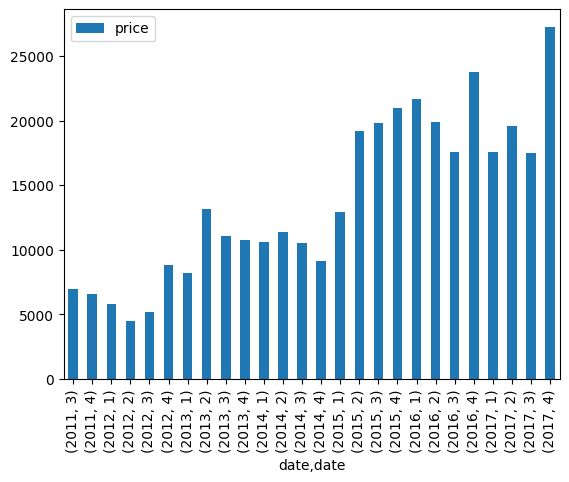

In [118]:
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'}).plot(kind='bar')

In [121]:
%matplotlib inline

C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args

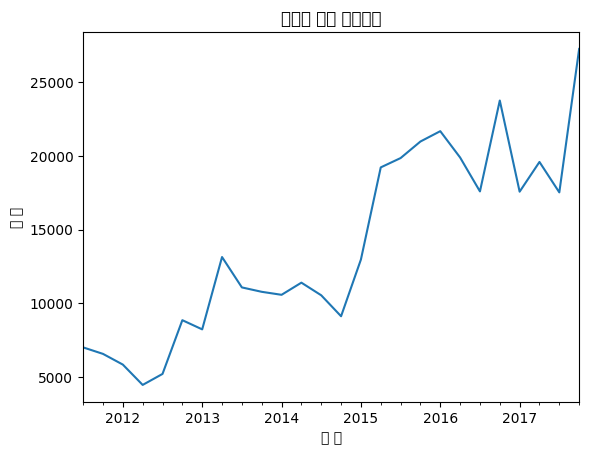

In [122]:
ax = df.resample("Q")['price'].mean().plot();
# datatime dtype에 한정된 groupby로 생각하면 된다. Q는 분기
ax.set_title("기간별 제품 평균가격");
ax.set_xlabel("기 간");
ax.set_ylabel("가 격");

## 브랜드별 리뷰수

In [123]:
df.groupby(['brand']).agg({'name':'count'})

,name
brand,
apple,13163
mi,1558
micromax,36325
samsung,13463


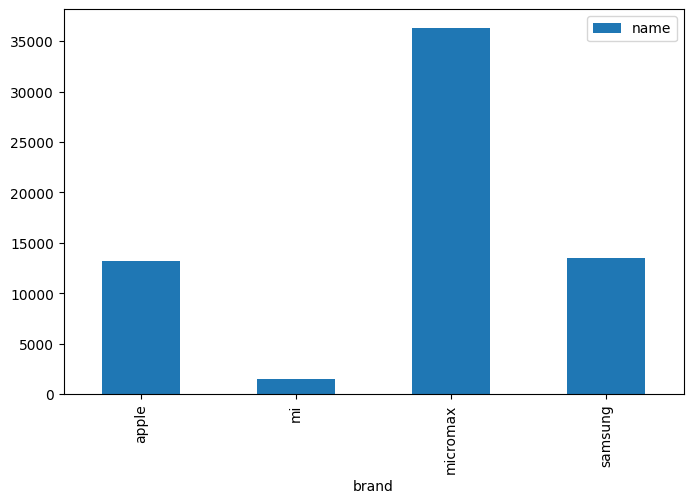

In [124]:
df.groupby(['brand']).agg({'name':'count'}).plot(kind='bar', figsize=(8,5));